# Modelo Auto Regressivo (AR)

## Introdução

O modelo auto regressivo (AR) é um modelo de séries temporais que utiliza valores passados da série para prever valores futuros. A ideia é que a série temporal é uma combinação linear de seus valores passados. A ordem do modelo AR é o número de valores passados que são utilizados para prever o valor futuro. O modelo AR é definido pela equação:

$$
X_t = C + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \ldots + \phi_p X_{t-p} + \epsilon_t
$$

onde $X_t$ é o valor da série temporal no instante $t$, $\phi_1, \phi_2, \ldots, \phi_p$ são os coeficientes do modelo e $\epsilon_t$ é o ruído branco. É comum utilizar a notação $AR(p)$ para indicar um modelo auto regressivo de ordem $p$.

Por exemplo $AR(1)$ é um modelo auto regressivo de ordem 1, que é definido pela equação:

$$
X_t = C + \phi_1 X_{t-1} + \epsilon_t
$$

quando $C = 0$ e $\phi=1$ o modelo $AR(1)$ é equivalente a um passeio aleatório. 

E $AR(2)$ é um modelo auto regressivo de ordem 2, que é definido pela equação:

$$
X_t = C + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \epsilon_t
$$

## Estimação dos parâmetros

Os parâmetros do modelo AR podem ser estimados utilizando o método dos mínimos quadrados. O método dos mínimos quadrados consiste em minimizar a soma dos quadrados dos resíduos. A função de perda é dada por:

$$
L = \sum_{t=1}^{n} (X_t - \hat{X}_t)^2
$$

onde $X_t$ é o valor real da série temporal e $\hat{X}_t$ é o valor previsto pelo modelo. A função de perda é minimizada em relação aos parâmetros do modelo.

## Ordem do modelo
Para achar a ordem de um modelo $AR$ podemos o `ACF` e `PACF` da série temporal. O `ACF` é a função de autocorrelação e o `PACF` é a função de autocorrelação parcial. O `ACF` mede a correlação entre a série temporal e suas versões passadas. O `PACF` mede a correlação entre a série temporal e suas versões passadas, mas controlando o efeito das versões intermediárias.

![acf_pacf](../figures/ar.png)

Seguindo a imagem acima, podemos ver que o `ACF` tem um decaimento lento. Isso indica que a série é um modelo `AR`.

![acf_ar2](../figures/acf_ar2.png)


E o `PACF` tem um corte acentuado no lag 2. Isso indica que a série é um modelo `AR(2)`.


![pacf_ar2](../figures/pacf_ar2.png)



**Mas o que é `PACF`?**

O `PACF` (Função de Autocorrelação Parcial) mede a correlação entre a série temporal e seus valores defasados, removendo o efeito das observações intermediárias. Em outras palavras, o `PACF` de lag 2 é a correlação entre a série no instante \( t \) e no instante \( t-2 \), mas eliminando a influência da observação no instante \( t-1 \). Isso ajuda a identificar a dependência direta entre a série e suas defasagens, sem a interferência de outras lags.

Matematicamente, o `PACF` para um lag \( k \) é dado por:

$$
\phi_{k,k} = \frac{Cov(X_t, X_{t-k} \mid X_{t-1}, X_{t-2}, \ldots, X_{t-k+1})}{\sqrt{Var(X_t \mid X_{t-1}, X_{t-2}, \ldots, X_{t-k+1}) \cdot Var(X_{t-k} \mid X_{t-1}, X_{t-2}, \ldots, X_{t-k+1})}}
$$

onde $Cov$ representa a covariância e $Var$ a variância.

Em um exemplo simples, consideram a seguite expressão

$$
y_t = 0.33 y_{t-1} + 0.50 y_{t-2}
$$

- Autocorrelação mede a correlação entre $y_t$ e $y_{t-2}$. Mas, $y_{t-1}$ está carregando a influencia do $y_{t-2}$. Então, nos não estamos medindo a correlação pura. 
- Autocorrelação parcial mede a correlação direta entre $y_t$ e $y_{t-2}$ sem a influencia do $y_{t-1}$.


In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(42)

ma2 = np.array([1, 0, 0])
ar2 = np.array([1, -0.33, -0.50])

AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

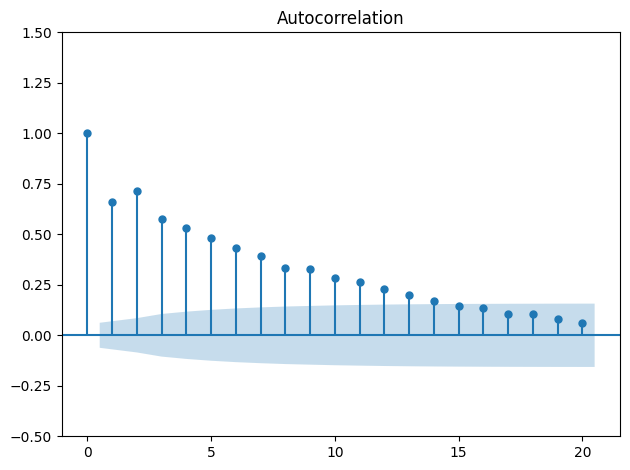

In [3]:
plot_acf(AR2_process, lags=20);

plt.ylim(-0.5, 1.5)
plt.tight_layout()

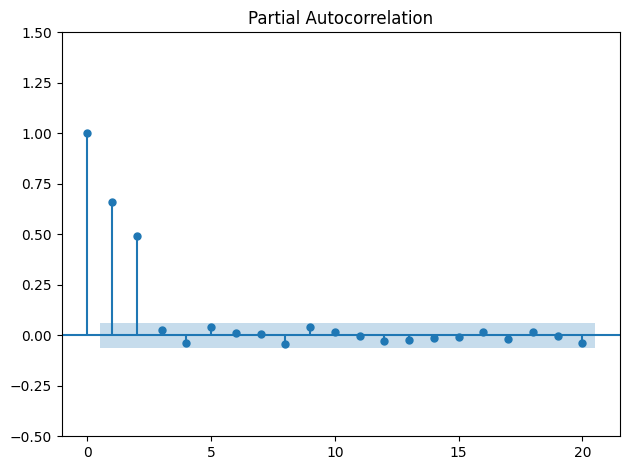

In [4]:
plot_pacf(AR2_process, lags=20);

plt.ylim(-0.5, 1.5)
plt.tight_layout()

In [7]:
df = pd.read_csv('../data/simulated_AR2.csv')
df.head()

,value
0,100.000000
1,100.496714
2,100.507464
3,101.456406
4,103.270569


Text(0, 0.5, 'Value')

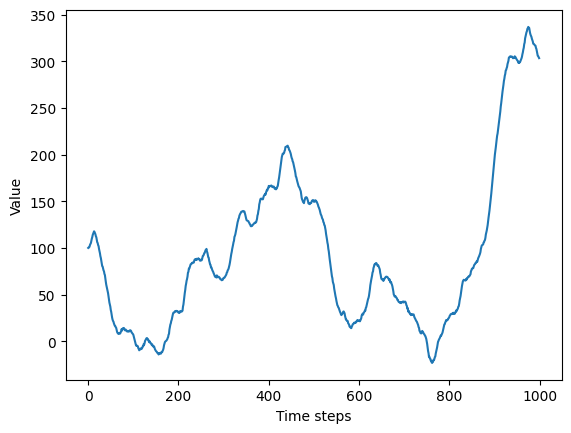

In [8]:
fig, ax = plt.subplots()

ax.plot(df['value'])
ax.set_xlabel('Time steps')
ax.set_ylabel('Value')

In [9]:
ADF_result = adfuller(df['value'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.1218683768898072
p-value: 0.7062727342770811


In [10]:
value_diff = np.diff(df['value'], n=1)

ADF_result = adfuller(value_diff)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -5.565515624443825
p-value: 1.507904341632095e-06


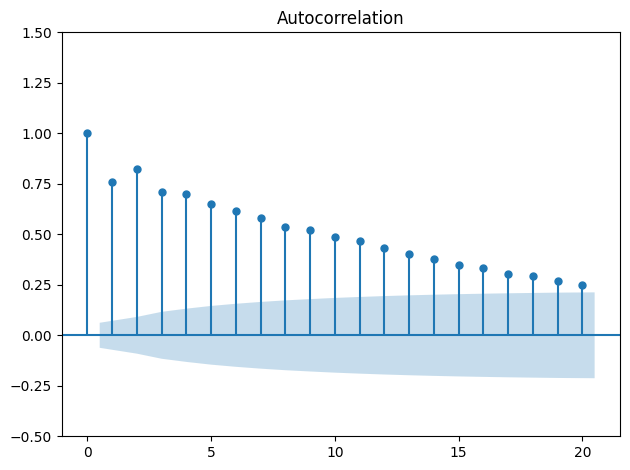

In [11]:
plot_acf(value_diff, lags=20);

plt.ylim(-0.5, 1.5)
plt.tight_layout()

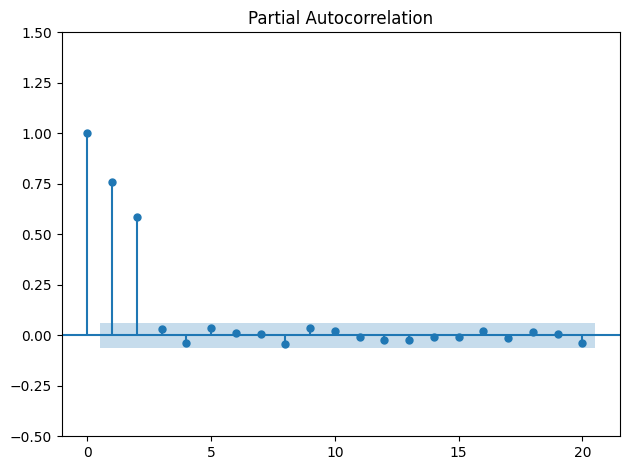

In [12]:
plot_pacf(value_diff, lags=20);

plt.ylim(-0.5, 1.5)
plt.tight_layout()

In [13]:
df_diff = pd.DataFrame({'value_diff': value_diff})

train = df_diff[:-100]
test = df_diff[-100:]

print(len(train))
print(len(test))

899
100


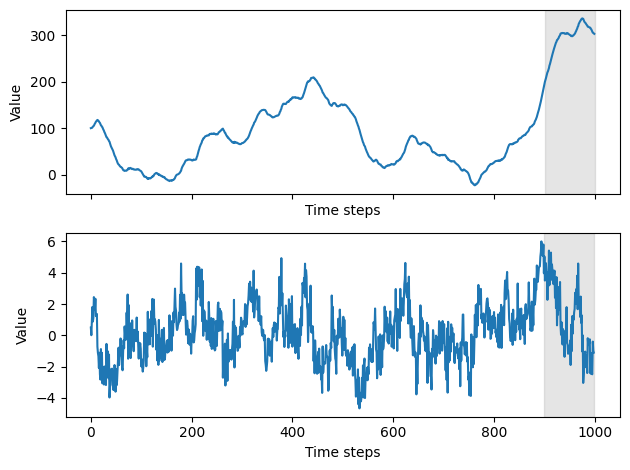

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.plot(df['value'])
ax1.set_xlabel('Time steps')
ax1.set_ylabel('Value')
ax1.axvspan(901, 1000, color='#808080', alpha=0.2)

ax2.plot(df_diff['value_diff'])
ax2.set_xlabel('Time steps')
ax2.set_ylabel('Value')
ax2.axvspan(899, 998, color='#808080', alpha=0.2)

plt.tight_layout()

In [15]:
def rolling_predictions(df_diff: pd.DataFrame, last_train_value: np.array, train_len: int, horizon: int, window: int, method: str) -> list:
    
    TOTAL_LEN = train_len + horizon
    
    if method == 'mean':
        pred_mean = []
        
        for i in range(train_len, TOTAL_LEN, window):
            mean = np.mean(df_diff[:i].values)
            pred_mean.extend(mean for _ in range(window))

        pred_mean = np.concatenate((last_train_value, pred_mean))
        pred_mean = pred_mean.cumsum()
        
        return pred_mean[:100]

    elif method == 'last':
        pred_last_value = []
        
        for i in range(train_len, TOTAL_LEN, window):
            last_value = df_diff[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))
            
        pred_last_value = np.concatenate((last_train_value, pred_last_value))
        pred_last_value = pred_last_value.cumsum()
        
        return pred_last_value[:100]
    
    if method == 'AR':
        pred_AR = []
        
        for i in range(train_len, TOTAL_LEN, window):
            model = SARIMAX(df_diff[:i], order=(2,0,0))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_AR.extend(oos_pred)
            
        pred_AR = np.concatenate((last_train_value, pred_AR))
        pred_AR = pred_AR.cumsum()
            
        return pred_AR[:100]

In [16]:
pred_df = df[-100:].copy()

TRAIN_LEN = len(train)
HORIZON = len(test)
LAST_TRAIN_VALUE = df.iloc[899].values

windows = [1, 2, 5, 10]

for window in windows:
    pred_mean = rolling_predictions(df_diff, LAST_TRAIN_VALUE, TRAIN_LEN, HORIZON, window, 'mean')
    pred_last = rolling_predictions(df_diff, LAST_TRAIN_VALUE, TRAIN_LEN, HORIZON, window, 'last')
    pred_AR = rolling_predictions(df_diff, LAST_TRAIN_VALUE, TRAIN_LEN, HORIZON, window, 'AR')

    pred_df[f'pred_mean_{window}'] = pred_mean
    pred_df[f'pred_last_{window}'] = pred_last
    pred_df[f'pred_AR_{window}'] = pred_AR

pred_df.head()

,value,pred_mean_1,pred_last_1,pred_AR_1,pred_mean_2,pred_last_2,pred_AR_2,pred_mean_5,pred_last_5,pred_AR_5,pred_mean_10,pred_last_10,pred_AR_10
900,194.932437,190.964834,190.964834,190.964834,190.964834,190.964834,190.964834,190.964834,190.964834,190.964834,190.964834,190.964834,190.964834
901,199.973978,191.066019,196.769146,195.747786,191.066019,196.769146,195.747786,191.066019,196.769146,195.747786,191.066019,196.769146,195.747786
902,203.473664,191.171499,200.736749,200.371169,191.167203,202.573457,200.635773,191.167203,202.573457,200.635773,191.167203,202.573457,200.635773
903,207.577239,191.282458,205.778290,204.265177,191.278162,207.614998,204.529780,191.268388,208.377769,204.961730,191.268388,208.377769,204.961730
904,212.186574,191.397174,209.277975,208.299480,191.389121,212.656539,208.690218,191.369572,214.182080,209.171915,191.369572,214.182080,209.171915


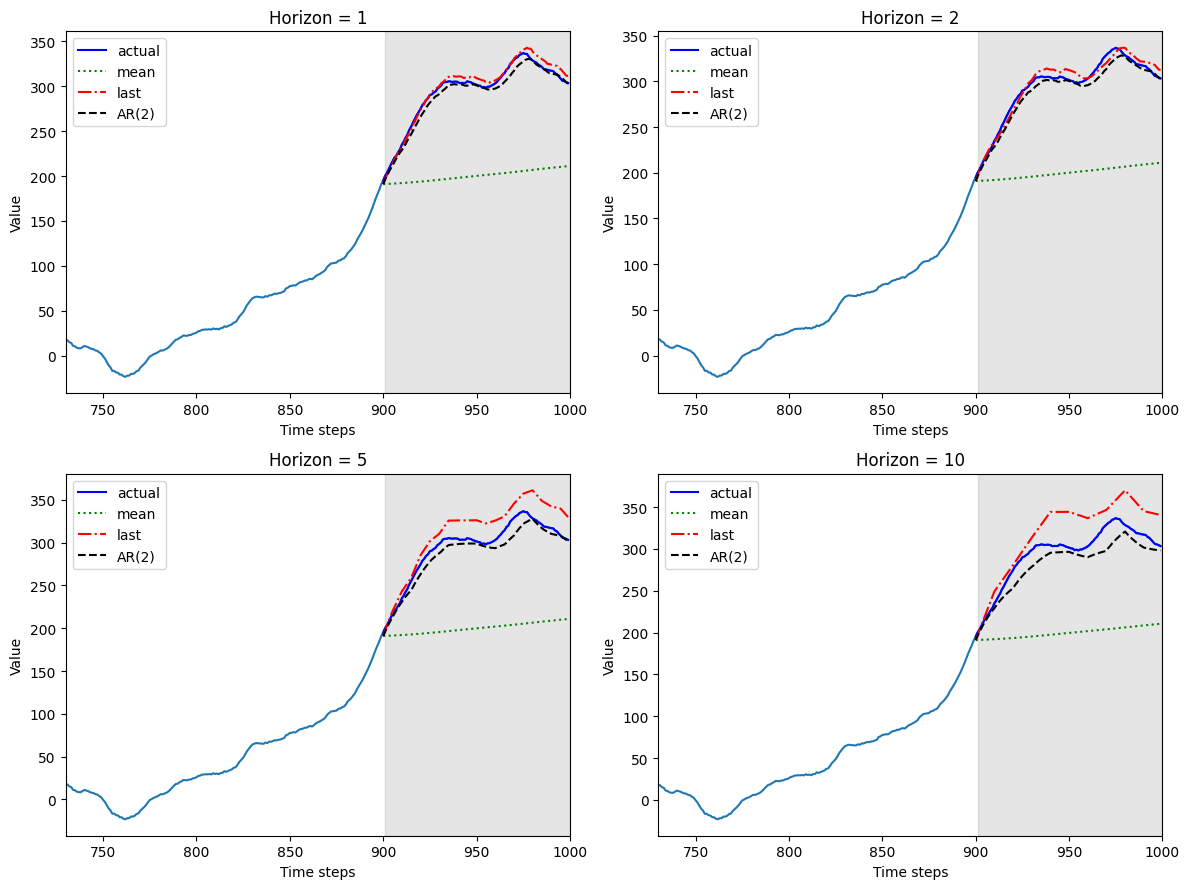

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,9))

for i, ax in enumerate(axes.flatten()):
    
    ax.plot(df['value'])
    ax.plot(pred_df['value'], 'b-', label='actual')
    ax.plot(pred_df[f'pred_mean_{windows[i]}'], 'g:', label='mean')
    ax.plot(pred_df[f'pred_last_{windows[i]}'], 'r-.', label='last')
    ax.plot(pred_df[f'pred_AR_{windows[i]}'], 'k--', label='AR(2)')
    
    ax.legend(loc=2)
    ax.set_xlabel('Time steps')
    ax.set_ylabel('Value')
    ax.axvspan(901, 1000, color='#808080', alpha=0.2)
    ax.set_xlim(730, 1000)
    ax.set_title(f'Horizon = {windows[i]}')
    
plt.tight_layout()

In [18]:
from sklearn.metrics import mean_absolute_error

mae_mean_1 = mean_absolute_error(pred_df['value'], pred_df['pred_mean_1'])
mae_last_1 = mean_absolute_error(pred_df['value'], pred_df['pred_last_1'])
mae_AR_1 = mean_absolute_error(pred_df['value'], pred_df['pred_AR_1'])

mae_mean_2 = mean_absolute_error(pred_df['value'], pred_df['pred_mean_2'])
mae_last_2 = mean_absolute_error(pred_df['value'], pred_df['pred_last_2'])
mae_AR_2 = mean_absolute_error(pred_df['value'], pred_df['pred_AR_2'])

mae_mean_5 = mean_absolute_error(pred_df['value'], pred_df['pred_mean_5'])
mae_last_5 = mean_absolute_error(pred_df['value'], pred_df['pred_last_5'])
mae_AR_5 = mean_absolute_error(pred_df['value'], pred_df['pred_AR_5'])

mae_mean_10 = mean_absolute_error(pred_df['value'], pred_df['pred_mean_10'])
mae_last_10 = mean_absolute_error(pred_df['value'], pred_df['pred_last_10'])
mae_AR_10 = mean_absolute_error(pred_df['value'], pred_df['pred_AR_10'])

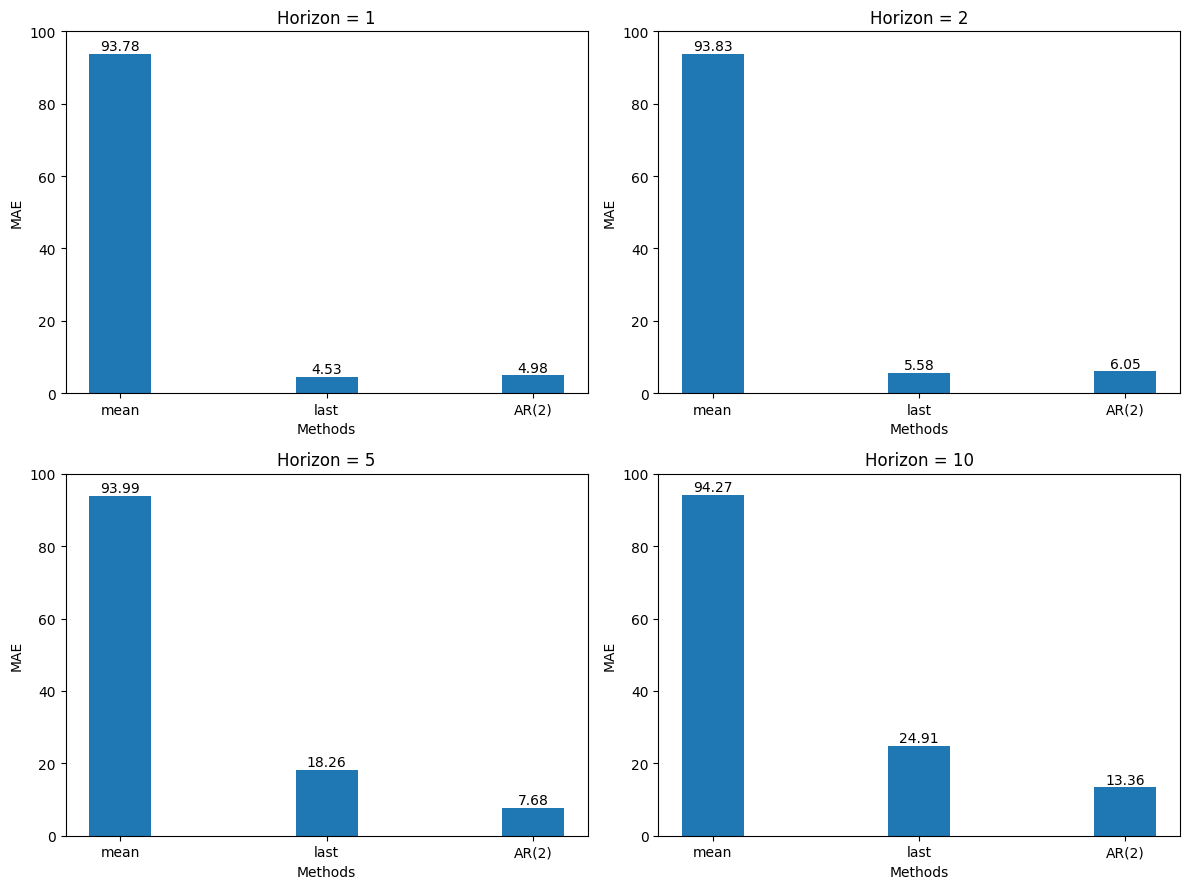

In [19]:
maes_mean = [mae_mean_1, mae_mean_2, mae_mean_5, mae_mean_10]
maes_last = [mae_last_1, mae_last_2, mae_last_5, mae_last_10]
maes_AR = [mae_AR_1, mae_AR_2, mae_AR_5, mae_AR_10]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,9))

x = ['mean', 'last', 'AR(2)']
width = 0.3

for i, ax in enumerate(axes.flatten()):
    
    y = [maes_mean[i], maes_last[i], maes_AR[i]]
    ax.bar(x, y, width)
    ax.set_xlabel('Methods')
    ax.set_ylabel('MAE')
    ax.set_ylim(0, 100)
    ax.set_title(f'Horizon = {windows[i]}')    
    
    for index, value in enumerate(y):
        ax.text(x=index, y=value+1, s=str(round(value, 2)), ha='center')

plt.tight_layout()